<a href="https://colab.research.google.com/github/samadpls/TensorFlow-Model-Exploration/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building an CatvsDog Model: Convolutional Neural Networks


**created by [samadpls](https://github.com/samadpls)**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images =  train_images/ 255.0 ,test_images/ 255.0

class_names = [ 'airplane', 'automobile', 'bird', 'cat', 'deet',
                 'dog','frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 2s 0us/step


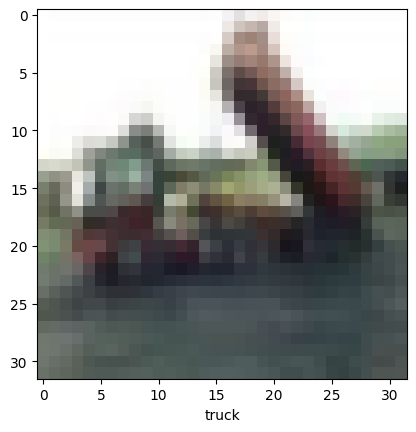

In [3]:
IMG_INDEX = 2
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [4]:
#Convolutional Base
model =  models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2))) #max pooling 2x2 sample and stride of 2
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
# adding dense layer

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) # relu => 0 to infinity, 64 neuron dense layer
model.add(layers.Dense(10)) #amount of classes are 10

In [9]:
model.summary( )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
# training
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #mostly use this for loss
    metrics=['accuracy']

)

history = model.fit(train_images, train_labels, epochs= 10,
                    validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 81s 51ms/step - loss: 1.5336 - accuracy: 0.4382 - val_loss: 1.2961 - val_accuracy: 0.5316
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1897 - accuracy: 0.5779 - val_loss: 1.1361 - val_accuracy: 0.5931
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0483 - accuracy: 0.6318 - val_loss: 1.0120 - val_accuracy: 0.6395
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9481 - accuracy: 0.6690 - val_loss: 0.9323 - val_accuracy: 0.6717
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8782 - accuracy: 0.6930 - val_loss: 0.9093 - val_accuracy: 0.6798
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8140 - accuracy: 0.7152 - val_loss: 0.8864 - val_accuracy: 0.6867
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7719 - accuracy: 0.7308 - val_loss: 0.9065 -

In [10]:
test_lost, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8711 - accuracy: 0.7039 - 4s/epoch - 13ms/step
0.7038999795913696


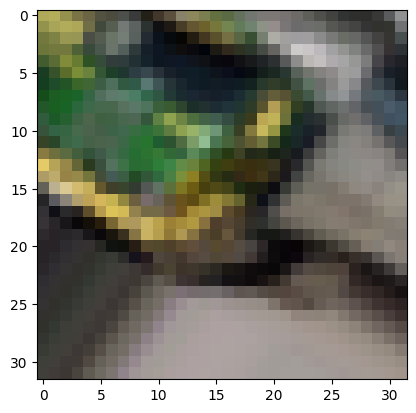

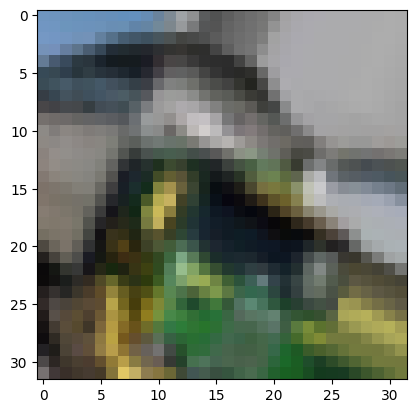

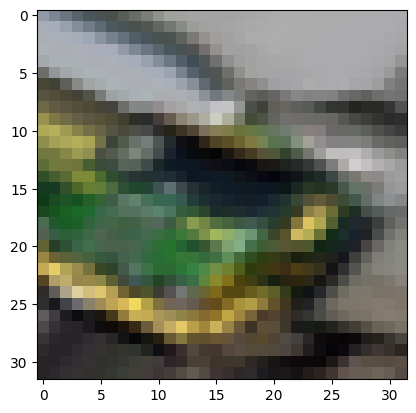

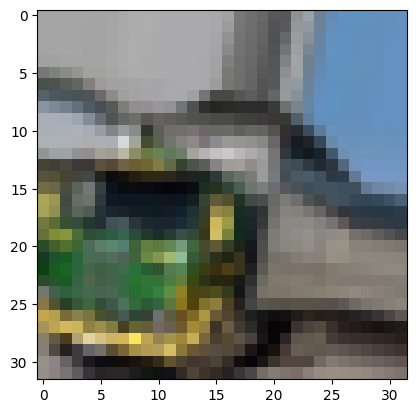

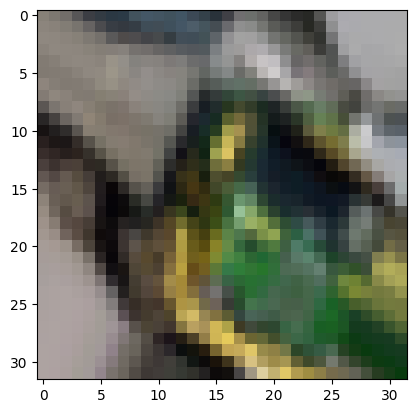

In [11]:
# to make good model for small dataset we use this technique
# that twerk that image to make it so many copies
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

# data generator object that transform images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): # this will loop forever untill we break to current directory
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i> 4:
    break

plt.show()


In [12]:
# Fine Tune also works
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [13]:
# dataset
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]','train[90%:]'], #1st train[:80%] for raw_train and so on
    with_info = True,
    as_supervised= True,
 )

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


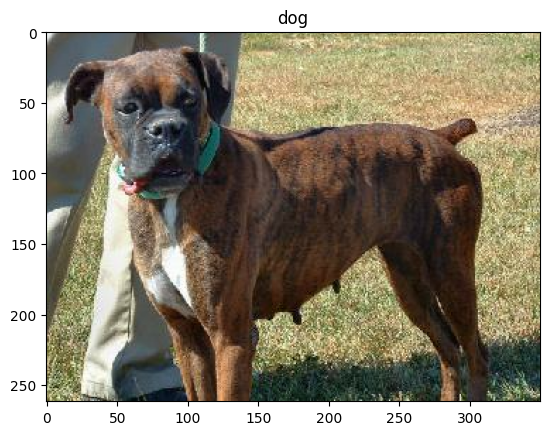

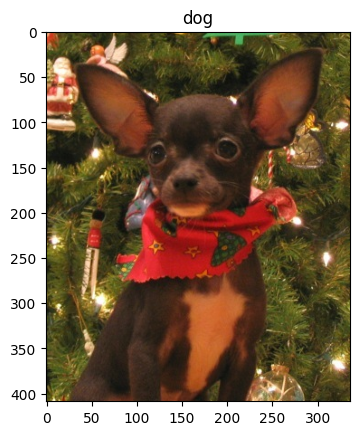

In [14]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [15]:
# reshape image size
img_size = 160 #small are good

def format_example(image, label):
  """
  return an image that is reshaped to img_size
  """
  image = tf.cast(image, tf.float32) #cast = convert every image to float32
  image = (image/127.5) - 1 #127.5 =>half of 255
  image= tf.image.resize(image, (img_size,img_size))
  return image,label

In [16]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

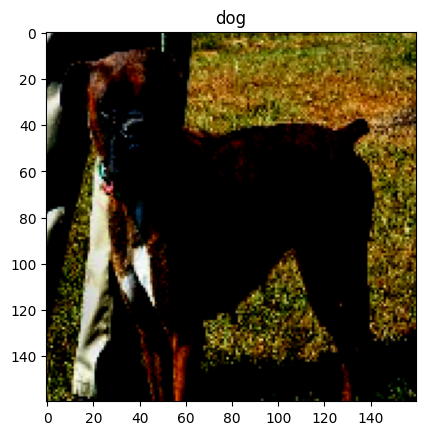

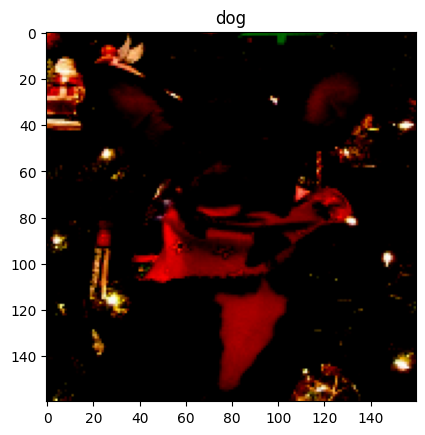

In [17]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [18]:
img_shape = (img_size, img_size, 3)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_shape,
    include_top=False,
    weights='imagenet'
)

9406464/9406464 [==============================] - 0s 0us/step


In [19]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [20]:
base_model.trainable = False #not want to train again
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [21]:
global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

In [22]:
prediction_layer = keras.layers.Dense(1) #only classifying cats and dogs thats why 1

In [23]:
model = tf.keras.Sequential([
    base_model,
    global_avg_layer,
    prediction_layer
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

**`model training is not implmented here because it take too much time to fine tune`**



